In [51]:
# Importi library
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [52]:
# Import dataset
datasetC = pd.read_csv('sample_data/Obesity Classification.csv')
datasetC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [53]:
datasetC.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


<ipython-input-54-1c654c48979f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datasetC.corr()


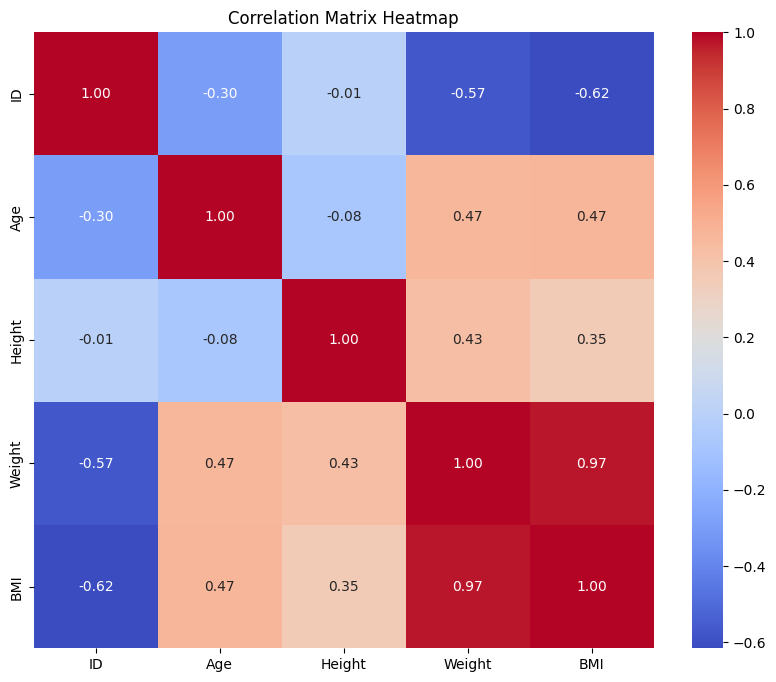

In [54]:
# Menghitung matriks korelasi
correlation_matrix = datasetC.corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [55]:
# Split data menjadi features (X) dan target variable (y)
X = datasetC.iloc[:, [3, 4]].values
y = LabelEncoder().fit_transform(datasetC.iloc[:, 6].values)

# Split data untuk Train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [56]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier pada Training set
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

# Predicting hasil Test set
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan akurasi
print("Akurasi:", accuracy)

Akurasi: 0.8518518518518519


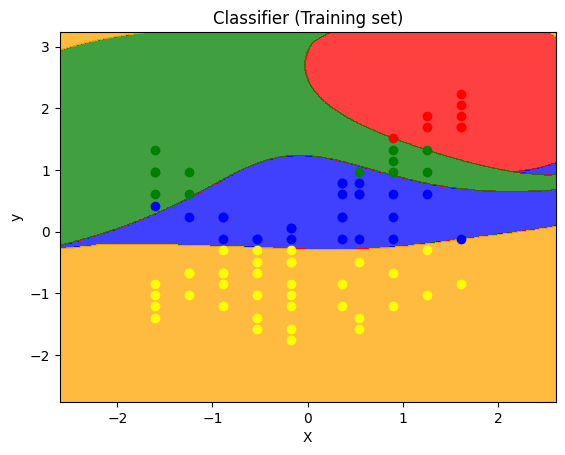

In [42]:
X_set, y_set = X_train, y_train

# Membuat meshgrid untuk plot pada decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Menggunakan classifier untuk predict label pada meshgrid point
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)

# Reshape prediction ke bentuk meshgrid
Z = Z.reshape(X1.shape)

# Plot contour
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('blue', 'red', 'green', 'orange')))

# Limit plot ke dalamam range data
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('blue', 'red', 'green', 'yellow'))(i), label=j)

plt.title('Classifier (Training set)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
